<a href="https://colab.research.google.com/github/Chinmay-Soman/Car_Price_Prediction/blob/main/Objectdetection_with_Faster_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing required versions of PyTorch

In [ ]:
! pip3 install torch==1.13.0 torchvision==0.14.0 torchaudio


In [ ]:
!pip install torchvision

Installing Conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


Creating virtual Environment

In [ ]:
!python -m venv tutorial-env

In [ ]:
!pip install torch torchvision

Importing required libraries.

In [ ]:
import torchvision

In [ ]:
import requests

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
import torchvision.transforms as transforms

In [ ]:
import torch



In [ ]:
def get_predictions(pred,threshold=0.8,objects=None ):
    """
    This function will assign a string name to a predicted class and eliminate predictions whose likelihood  is under a threshold

    pred: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class yhat, probability of belonging to that class and the coordinates of the bounding box corresponding to the object
    image : frozen surface
    predicted_classes: a list where each element contains a tuple that corresponds to information about  the different objects; Each element includes a tuple with the class name, probability of belonging to that class and the coordinates of the bounding box corresponding to the object
    thre
    """


    predicted_classes= [(COCO_INSTANCE_CATEGORY_NAMES[i],p,[(box[0], box[1]), (box[2], box[3])]) for i,p,box in zip(list(pred[0]['labels'].numpy()),pred[0]['scores'].detach().numpy(),list(pred[0]['boxes'].detach().numpy()))]
    predicted_classes=[  stuff  for stuff in predicted_classes  if stuff[1]>threshold ]

    if objects  and predicted_classes :
        predicted_classes=[ (name, p, box) for name, p, box in predicted_classes if name in  objects ]
    return predicted_classes

Function to draw a box aroun the image.

In [ ]:
def draw_box(predicted_classes, image, rect_th=10, text_size=3, text_th=3):
    img = (
        np.clip(
            cv2.cvtColor(
                np.clip(image.numpy().transpose((1, 2, 0)), 0, 1), cv2.COLOR_RGB2BGR
            ),
            0,
            1,
        )
        * 255
    ).astype(np.uint8).copy()

    for predicted_class in predicted_classes:
        label = predicted_class[0]
        probability = predicted_class[1]
        box = predicted_class[2]

        print("box:", box)  # Add this line to print the box variable

        cv2.rectangle(
            img,
            (box[0][0], box[0][1]),
            (box[1][0], box[1][1]),
            (0, 255, 0),
            rect_th,
        )
        cv2.putText(
            img,
            label,
            (box[0][0], box[0][1]),
            cv2.FONT_HERSHEY_SIMPLEX,
            text_size,
            (0, 255, 0),
            thickness=text_th,
        )
        cv2.putText(
            img,
            label + ": " + str(round(probability, 2)),
            (box[0][0], box[0][1]),
            cv2.FONT_HERSHEY_SIMPLEX,
            text_size,
            (0, 255, 0),
            thickness=text_th,
        )

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    del img
    del image


Deleting the image to save RAM.

In [ ]:
def save_RAM(image_=False):
    global image, img, pred
    torch.cuda.empty_cache()
    del(img)
    del(pred)
    if image_:
        image.close()
        del(image)

Traing the model.

In [ ]:
import torchvision

In [ ]:
def model(x):
    with torch.no_grad():
        yhat = model_(x)
    return yhat

In [ ]:
model_ = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model_.eval()

for name, param in model_.named_parameters():
    param.requires_grad = False
print("done")

done


In [ ]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
len(COCO_INSTANCE_CATEGORY_NAMES)

91

Testing the Model.

In [ ]:
!pip install Pillow
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch
import numpy as np
import cv2

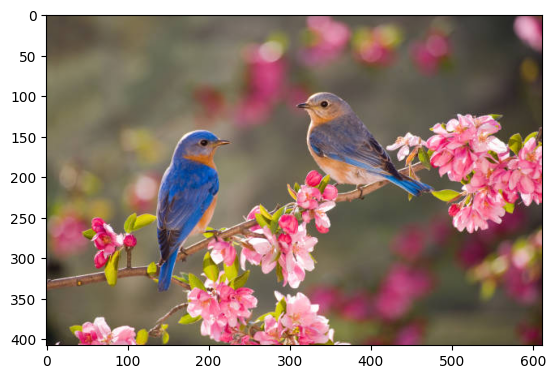

In [ ]:
img_path='/content/bird.jpg'
half = 0.5
image = Image.open(img_path)

image.resize( [int(half * s) for s in image.size] )

plt.imshow(image)
plt.show()

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
img = transform(image)

In [ ]:
pred = model([img])

In [ ]:
pred[0]['labels']

tensor([16, 16, 64, 64, 64, 16, 67, 88, 53, 16, 86, 64, 64,  1])

In [ ]:
pred[0]['scores']

tensor([0.9986, 0.9977, 0.3062, 0.2191, 0.1883, 0.1669, 0.1396, 0.1164, 0.1046,
        0.0676, 0.0657, 0.0639, 0.0547, 0.0540])

In [ ]:
bounding_box=pred[0]['boxes'][0].tolist()
bounding_box

[130.65785217285156,
 140.99021911621094,
 227.80982971191406,
 325.07696533203125]

In [ ]:
t,l,r,b=[round(x) for x in bounding_box]

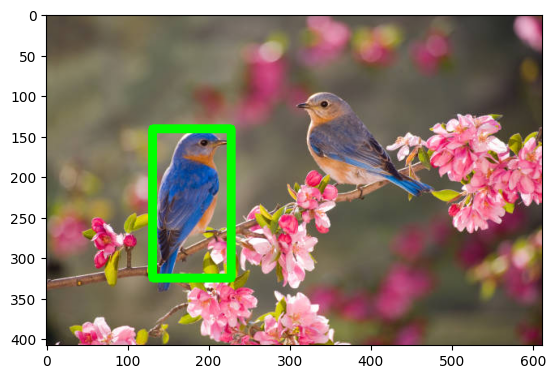

In [ ]:
img_plot=(np.clip(cv2.cvtColor(np.clip(img.numpy().transpose((1, 2, 0)),0,1), cv2.COLOR_RGB2BGR),0,1)*255).astype(np.uint8)
cv2.rectangle(img_plot,(t,l),(r,b),(0, 255, 0), 10) # Draw Rectangle with the coordinates
plt.imshow(cv2.cvtColor(img_plot, cv2.COLOR_BGR2RGB))
plt.show()
del img_plot, t, l, r, b

In [ ]:
index=pred[0]['labels'][0].item()
COCO_INSTANCE_CATEGORY_NAMES[index]

'bird'